### Project 1 — Titanic Dataset EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Better visualization
sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


### 2. Load the Dataset

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Check missing value
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### ML intuition:
* Missing values affect model stability
* Some algorithms cannot handle NaNs directly

### 4. Clean Missing Values
Handle Age (numerical)

Use median because it is robust to outliers.

In [7]:
df["age"].fillna(df["age"].median(),inplace=True)

#### Handle Embarked (categorical)

Fill with most frequent value (mode).

In [8]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace = True)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 5.Explore Distributions
Age Distribution

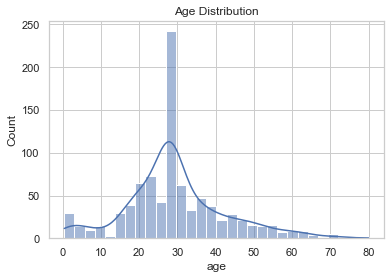

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

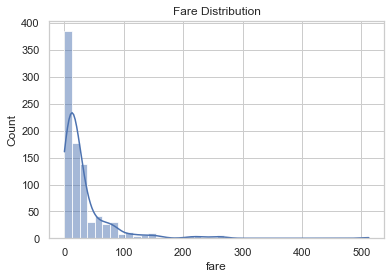

In [12]:
# Fare distribution 
plt.figure(figsize=(6,4))
sns.histplot(df["fare"],bins=40,kde=True)
plt.title("Fare Distribution")
plt.show()

##### ML intuition:
* Fare is right-skewed
* Log transformation may help linear models

#### Passenger Class (Pclass)

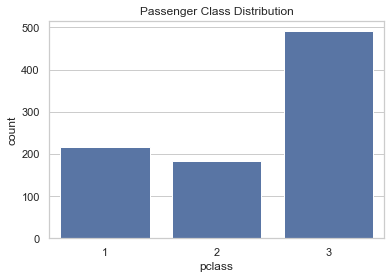

In [13]:
sns.countplot(x="pclass",data=df)
plt.title("Passenger Class Distribution")
plt.show()

#### Sex Distribution

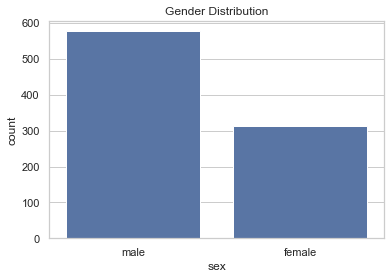

In [14]:
sns.countplot(x="sex",data = df)
plt.title("Gender Distribution")
plt.show()

### 6. Identify Outliers in Fare
Boxplot

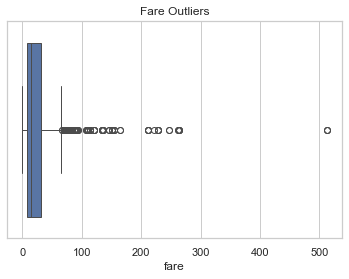

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["fare"])
plt.title("Fare Outliers")
plt.show()

In [17]:
# IQR Method
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3-Q1

outliers = df[(df["fare"]<Q1 -1.5*IQR)| (df["fare"]>Q3+1.5*IQR)]
outliers.shape

(116, 15)

#### ML intuition:
* Outliers strongly affect linear regression and distance-based models
* Tree models are more robust

### 7. Encode Categorical Variables (for Correlation)

In [20]:
df_encoded = df.copy()
df_encoded["sex"] = df_encoded["sex"].map({"male":0,"female":1})
df_encoded["embarked"] = df_encoded["embarked"].map({"S":0,"C":1,"Q":2})
df_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,Third,man,True,NaN,Southampton,no,True


### 8. Correlation Heatmap

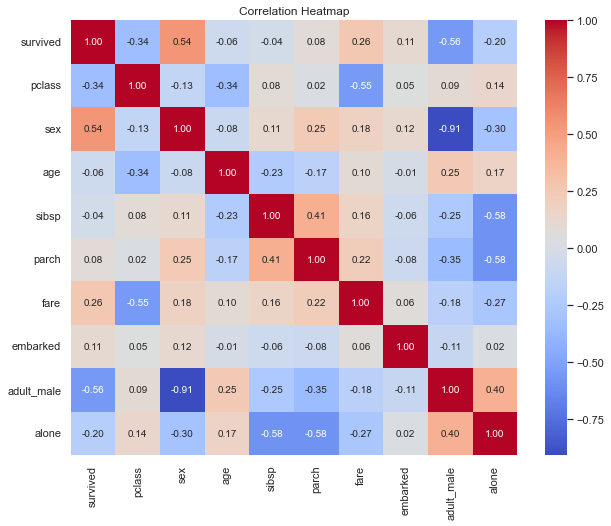

In [25]:
df_encoded = df.copy()
df_encoded["sex"] = df_encoded["sex"].map({"male":0,"female":1})
df_encoded["embarked"] = df_encoded["embarked"].map({"S":0,"C":1,"Q":2})

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### ML intuition:
* Survival correlates with sex, pclass, fare
* Multicollinearity awareness helps feature selection

### 9. Quick Statistical Summary

In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Key Findings from Titanic EDA

- Age has a roughly normal distribution with slight right skew
- Fare is heavily right-skewed with strong outliers
- Most passengers belong to 3rd class
- Gender imbalance exists (more males than females)
- Survival is strongly correlated with:
  - Sex (female survival higher)
  - Passenger class
  - Fare
- Outliers in Fare may need transformation or capping
- Feature engineering is required before modeling


### Project 2: Custom Dataset EDA — Housing Prices (housing.csv)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
df.shape

(20640, 10)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df.isnull().sum().sort_values(ascending = False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [46]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [47]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 5. Type Conversion (If Needed)

Automatically attempt numeric conversion where possible.

In [49]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col],errors="ignore")
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
# 6. Missing Value Handeling 
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

In [51]:
# Fill numerical columns with median
for col in numeric_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [52]:
# Fill categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [54]:
df.isnull().sum().sum()

0